# Visualização de dados

A visualização de dados é muito importante na análise exploratória de dados (Exploratory Data Analysis - EDA). Com visualizações podemos aprender sobre nossos dados de forma mais intuitiva e podemos identificar padrões que podem ser estudados quantitativamente posteriormente.

Vamos estudar duas bibliotecas a princípio, mas todas elas funcionam de forma muito semelhante e em geral basta ler a documentação ou utilizar a função help() para obter ajuda nas funções que usamos para gerar os dados.

Para o seaborn, usei esse estudo do Kaggle como inspiração: https://www.kaggle.com/code/balraj98/visualizing-the-space-race/notebook

In [66]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [67]:
# Importe os dados do arquivo Space_Corrected.csv como um DataFrame
dados = pd.read_csv('Space_Corrected.csv')
dados.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [68]:
fra = dados[dados['Company Name'] == "Arm??e de l'Air"]
correction = []
for name in dados['Company Name']:
    if name == "Arm??e de l'Air":
        correct = "Armée de l'Air"
        correction.append(correct)
    else:
        correction.append(name)

dados['Company Name'] = correction
dados['Company Name'].value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Armée de l'Air         4


In [95]:
correction = []
for name in dados['Location']:
    if name == "VLS Pad, Alc?›ntara Launch Center, Maranh?œo, Brazil":
        correct = "VLS Pad, Alcântara Launch Center, Maranhão, Brazil"
        correction.append(correct)
    else:
        correction.append(name)
        
dados['Location'] = correction

<AxesSubplot:xlabel='Ano'>

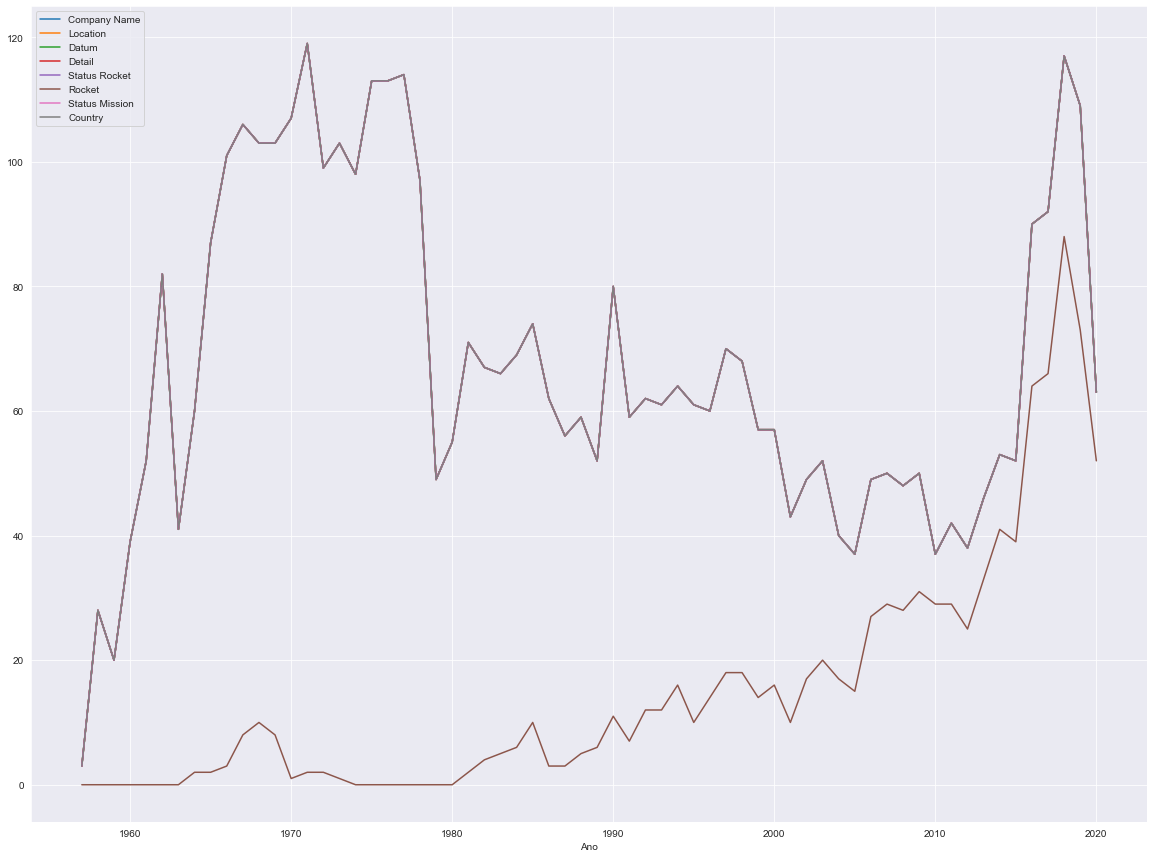

In [96]:
# A coluna Datum possui informações sobre a data de lançamento
# Para transformar a data de texto para datetime e poder obter o ano, vamos utilizar a função to_datetime
# Assim vamos obter o ano de cada lançamento e salvar em uma nova coluna
dados['Ano'] = [i.year for i in pd.to_datetime(dados['Datum'])]
# Obtenha quantos lançamentos foram realizados por ano e qual ano teve mais lançamentos
por_ano = dados.groupby('Ano').count().sort_values('Ano',ascending=False)

# O gráfico padrão da função plot() de um DataFrame é um gráfico de linhas.
por_ano.plot(figsize=(20,15))

<AxesSubplot:xlabel='Ano'>

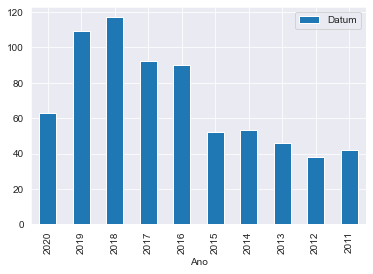

In [97]:
# Um gráfico de barras pode ser obtido utilizando a função bar() do módulo plot
por_ano[['Datum']][0:10].plot.bar()
#help(pd.DataFrame.plot.bar)

## Backends - Bibliotecas de Visualização

Ao longo de nossa jornada de programação, vamos nos deparar com diferentes bibliotecas para realizar a mesma tarefa, então podemos mudar de acordo com nossas preferências. É comum se referir à biblioteca por detrás de nossos gráficos como backend. 

Todos os gráficos que fizemos até aqui usando o módulo plot da biblioteca Pandas, ou seja, direto do DataFrame que contém os dados, utiliza a biblioteca Matplotlib como backend. Isso quer dizer que o Pandas usa a Matplotlib para produzir seus gráficos. 

Aqui vamos produzir o mesmo gráfico utilizando uma biblioteca chamada Seaborn. Entenda que é possível obter gráficos de alta qualidade com ambas as bibliotecas, ou backends.

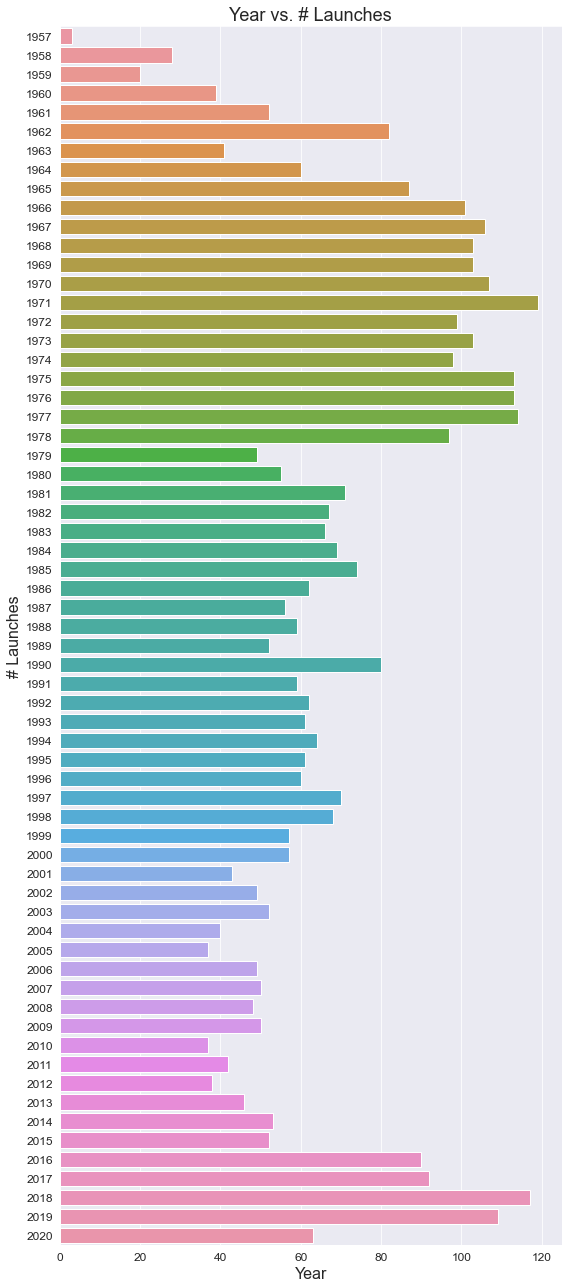

In [98]:
# Para produzir nosso gráfico, começamos com 
# uma figura Matplotlib que vamos preencher com 
# nosso gráfico Seaborn
plt.figure(figsize=(8,18)) # nova figura
ax = sns.countplot(y=dados['Ano']) # gráfico de barras
ax.axes.set_title("Year vs. # Launches",fontsize=18) # título
ax.set_xlabel("Year",fontsize=16) # rótulos dos eixos x e y
ax.set_ylabel("# Launches",fontsize=16)
ax.tick_params(labelsize=12) # tamanho da fonte dos rótulos
plt.tight_layout() 
plt.show() # mostra o gráfico gerado



<AxesSubplot:ylabel='Frequency'>

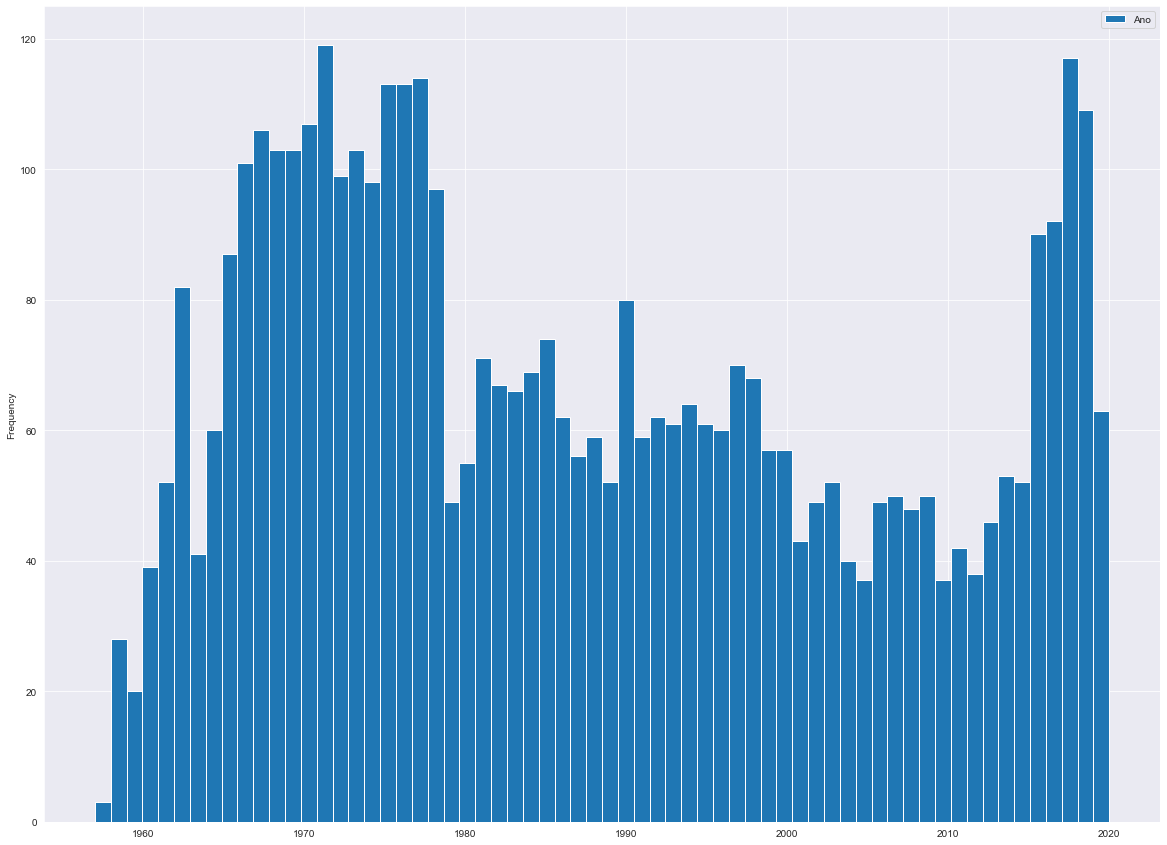

In [99]:
# O histograma permite visualizar o número de vezes que um valor se repete
# também chamado frequência daquele valor.
dados.plot.hist(bins=64, figsize=(20,15))
#help(pd.DataFrame.plot.bar)

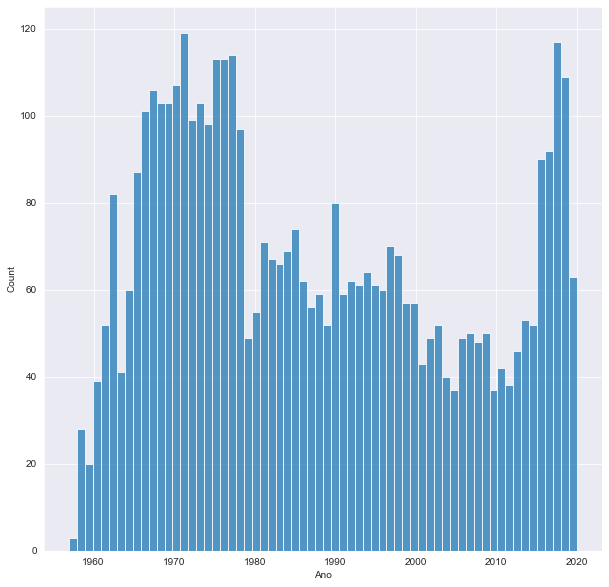

In [100]:
plt.figure(figsize=(10,10))
ax = sns.histplot(data=dados, x='Ano', bins=64)
plt.show()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Status Mission, dtype: int64

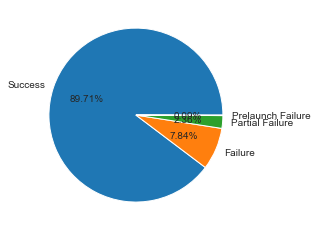

In [101]:

# Determine quantos lançamentos foram bem sucedidos
por_status = dados['Status Mission'].value_counts()
por_status_labels = ['Success','Failure',
                     'Partial Failure', 'Prelaunch Failure']

# O gráfico de pizza chama-se pie() no Matplotlib :9
plt.pie(por_status, labels=por_status_labels, autopct='%1.2f%%')
por_status

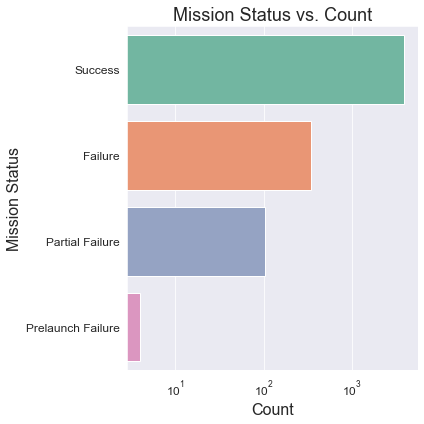

In [102]:
# Vamos agora obter como gráfico de barras

plt.figure(figsize=(6,6))
ax = sns.countplot(y="Status Mission", data=dados, order=dados["Status Mission"].value_counts().index, palette="Set2")
ax.set_xscale("log")
ax.axes.set_title("Mission Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=16)
ax.set_ylabel("Mission Status",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()



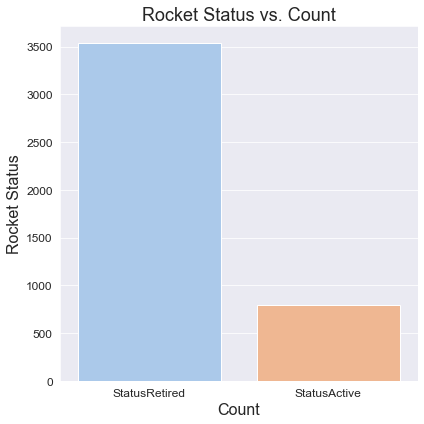

In [103]:


plt.figure(figsize=(6,6))
ax = sns.countplot(x="Status Rocket", data=dados, order=dados["Status Rocket"].value_counts().index, palette="pastel")
ax.axes.set_title("Rocket Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=16)
ax.set_ylabel("Rocket Status",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()



Success              1614
Failure               121
Partial Failure        41
Prelaunch Failure       1
Name: Status Mission, dtype: int64

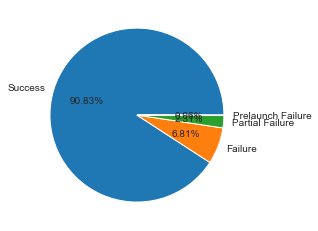

In [104]:
ussr = dados[dados['Company Name'] == 'RVSN USSR']
ussr_status = ussr['Status Mission'].value_counts()
ussr_status_labels = ['Success','Failure',
                      'Partial Failure', 'Prelaunch Failure']
plt.pie(ussr_status,labels=ussr_status_labels,autopct='%1.2f%%')
ussr_status

<Figure size 1440x1440 with 0 Axes>

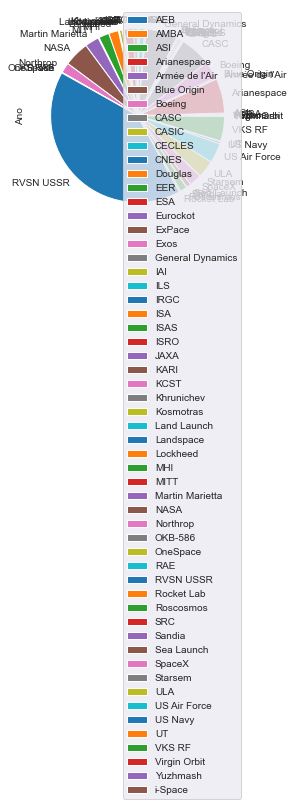

In [105]:

# Determine quantos lançamentos foram realizados por cada Company Name
# Quantos lançamentos são brasileiros (Agência Espacial Brasileira - AEB)?
por_compania = dados.groupby('Company Name').count()
plt.figure(figsize=(20,20))
ax1 = por_compania.plot.pie(y='Ano')
plt.show()

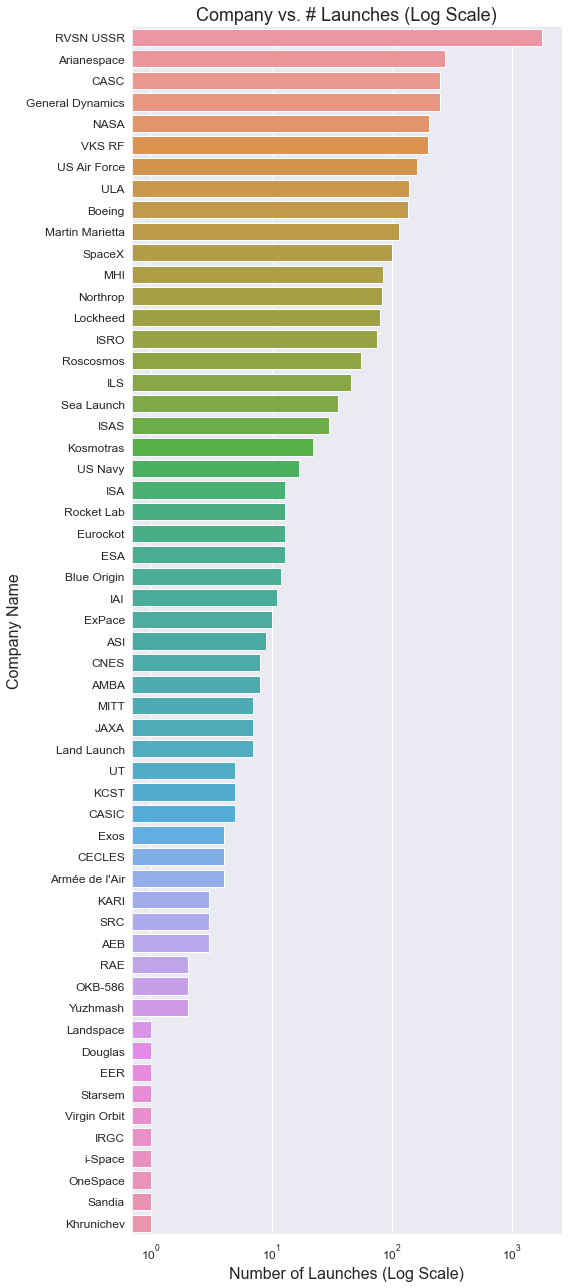

In [106]:
plt.figure(figsize=(8,18))
ax = sns.countplot(y="Company Name", data=dados, order=dados["Company Name"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Company vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Company Name",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

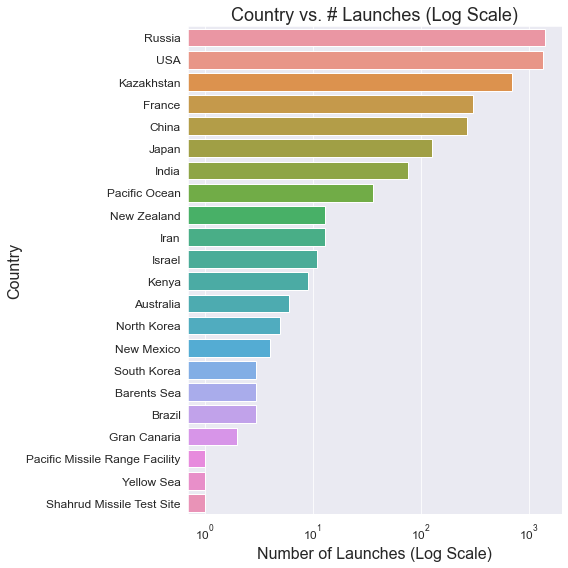

In [107]:
dados["Country"] = dados["Location"].apply(lambda location: location.split(", ")[-1])
dados.head()


plt.figure(figsize=(8,8))
ax = sns.countplot(y="Country", data=dados, order=dados["Country"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Country vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()



Failure              2
Prelaunch Failure    1
Name: Status Mission, dtype: int64

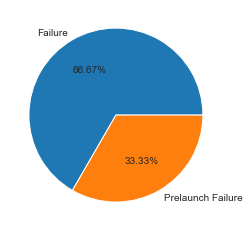

In [108]:
brazil = dados[dados['Company Name'] == 'AEB']
brazil_status = brazil['Status Mission'].value_counts()
brazil_status_labels = ['Failure', 'Prelaunch Failure']
plt.pie(brazil_status,labels=brazil_status_labels,autopct='%1.2f%%')
brazil_status

In [109]:
brazil

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Ano,Country
1032,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...","Mon Aug 25, 2003","VLS-1 | SATEC, UNOSAT",StatusActive,NaN,Prelaunch Failure,2003,Brazil
1221,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...","Sat Dec 11, 1999 19:40 UTC",VLS-1 | SACI-2,StatusActive,NaN,Failure,1999,Brazil
1354,AEB,"VLS Pad, Alcântara Launch Center, Maranhão, Br...","Sun Nov 02, 1997",VLS-1 | SCD-2A,StatusActive,NaN,Failure,1997,Brazil


In [110]:
brazil.loc[1032,'Location']

'VLS Pad, Alcântara Launch Center, Maranhão, Brazil'